In [9]:
# You can install using the pacman package using the following code:
if (!requireNamespace('pacman', quietly = TRUE)){
  install.packages('pacman')
}

In [10]:
pacman::p_load(wehoop, dplyr, glue, tictoc, progressr, ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


wehoop installed



In [11]:
tictoc::tic()
progressr::with_progress({
  wnba_player_box <- wehoop::load_wnba_player_box(season=c(2012:2023))
})
tictoc::toc()

6.32 sec elapsed


In [12]:
#nneka's regular season games only
nneka_box <- subset(wnba_player_box, athlete_display_name=="Nneka Ogwumike" & season_type==2 & team_location=="Los Angeles" & did_not_play==FALSE)

In [17]:
nrow(nneka_box)

[1] 356

In [13]:
## 1782985 rows of WNBA play-by-play data from 4674 games.
#dplyr::glimpse(nneka_box)

In [14]:
#most stats are calculated per-game except for shooting stats
nneka_box <- nneka_box %>%
  group_by(season, team_location) %>%
  summarise(GP=sum(minutes>0, na.rm=TRUE), MIN=sum(minutes, na.rm = TRUE)/GP, PTS=sum(points, na.rm = TRUE)/GP,
    P2M=sum(field_goals_made, na.rm = TRUE)-sum(three_point_field_goals_made, na.rm = TRUE), P2A=sum(field_goals_attempted, na.rm = TRUE)-sum(three_point_field_goals_attempted, na.rm = TRUE), P2p=100*P2M/P2A,
    P3M=sum(three_point_field_goals_made, na.rm = TRUE), P3A=sum(three_point_field_goals_attempted, na.rm = TRUE), P3p=100*P3M/P3A,
    FTM=sum(free_throws_made, na.rm = TRUE), FTA=sum(free_throws_attempted, na.rm = TRUE), FTp=100*FTM/FTA,
    OREB=sum(offensive_rebounds, na.rm = TRUE)/GP, DREB=sum(defensive_rebounds, na.rm = TRUE)/GP, AST=sum(assists, na.rm = TRUE)/GP,
    TOV=sum(turnovers, na.rm = TRUE)/GP, STL=sum(steals, na.rm = TRUE)/GP, BLK=sum(blocks, na.rm = TRUE)/GP,
    PF=sum(fouls, na.rm = TRUE)/GP) %>%
  rename(Season=season, Team=team_location) %>%
  as.data.frame()

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [ ]:
nneka_box

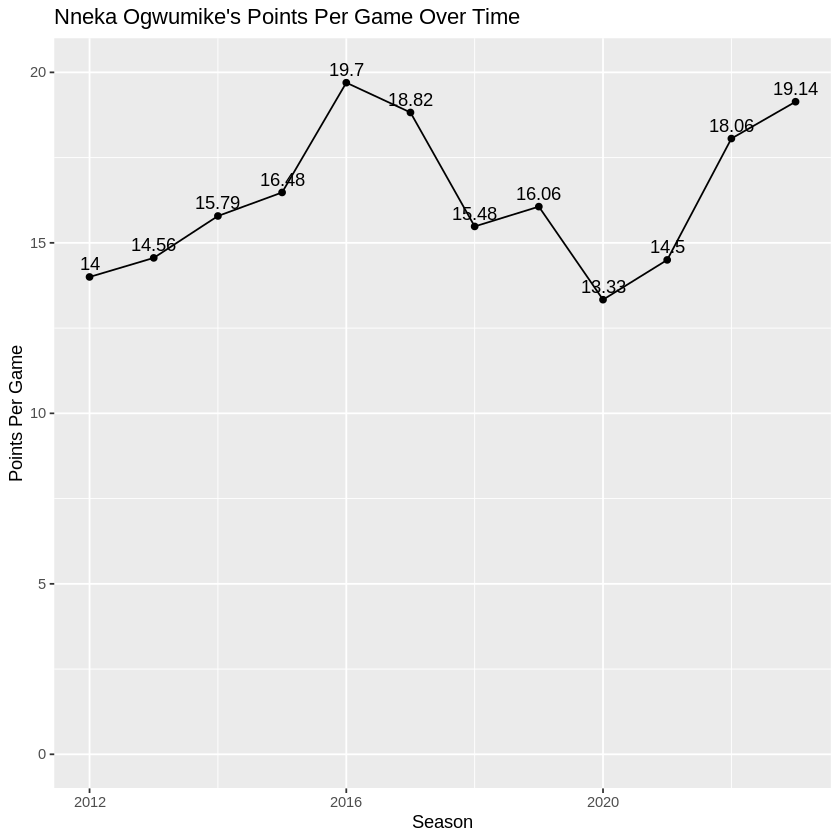

In [24]:
# prompt: visualize the data from nneka_box in a way that shows how she has improved over time

# Create a line chart of Nneka's points per game over time
ggplot(nneka_box, aes(x = Season, y = PTS)) +
  geom_line() +
  geom_point()+
  geom_text(aes(label = round(PTS, 2)), vjust = -0.5) +
  labs(title = "Nneka Ogwumike's Points Per Game Over Time",
       x = "Season",
       y = "Points Per Game")+
      coord_cartesian(xlim = c(2012, 2023), ylim = c(0, 20))


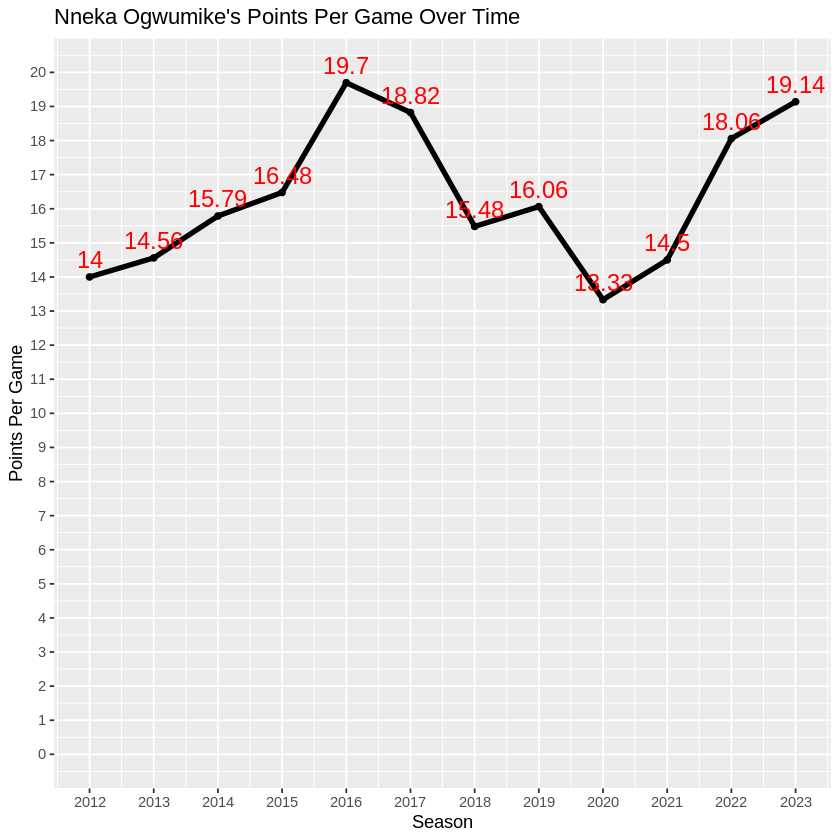

In [44]:
# Create a line chart of Nneka's points per game over time
ggplot(nneka_box, aes(x = Season, y = PTS)) +
  geom_line(size = 1.5) +
  geom_point()+
  geom_text(aes(label = round(PTS, 2)), vjust = -0.5, size = 5, color="red") +
  labs(title = "Nneka Ogwumike's Points Per Game Over Time",
       x = "Season",
       y = "Points Per Game")+
      coord_cartesian(xlim = c(2012, 2023), ylim = c(0, 20))+
      scale_x_continuous(breaks = unique(nneka_box$Season)) +
      scale_y_continuous(breaks = c(0:20))

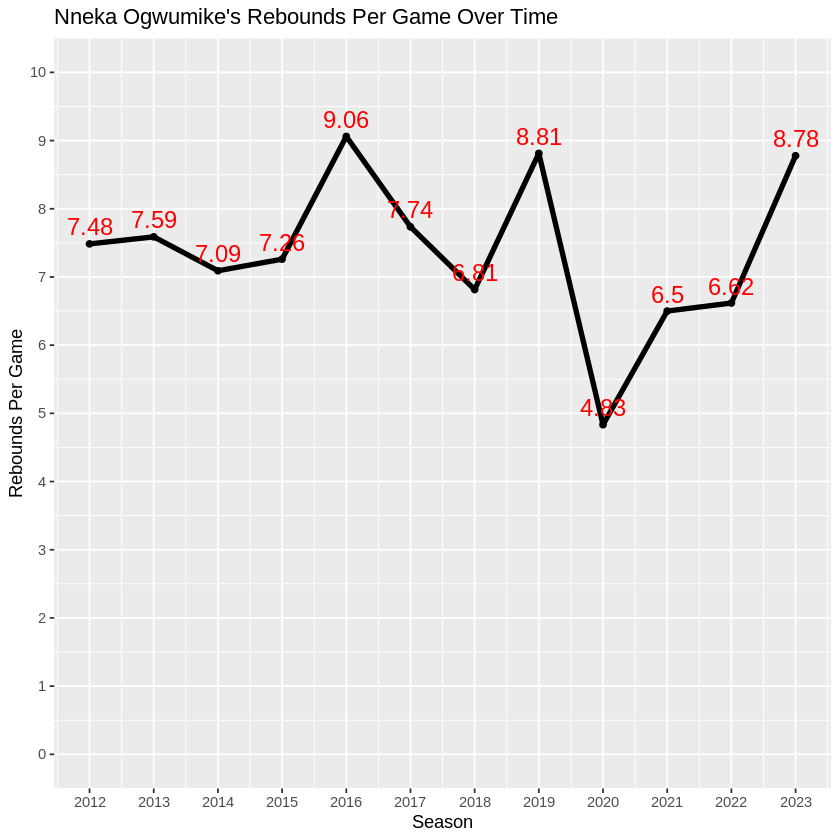

In [41]:
# Create a line chart of Nneka's rebounds per game over time
ggplot(nneka_box, aes(x = Season, y = OREB+DREB)) +
  geom_line(size = 1.5) +
  geom_point()+
  geom_text(aes(label = round(OREB+DREB, 2)), vjust = -0.5, size = 5, color="red") +
  labs(title = "Nneka Ogwumike's Rebounds Per Game Over Time",
       x = "Season",
       y = "Rebounds Per Game")+
      coord_cartesian(xlim = c(2012, 2023), ylim = c(0, 10))+
      scale_x_continuous(breaks = unique(nneka_box$Season)) +
      scale_y_continuous(breaks = c(0:10))